In [2]:
import matplotlib.pyplot as plt
plt.style.use('default')
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF

# Visualização de Dados

## Carregar dados

In [3]:
df = pd.read_csv('./datasets/IMDB Dataset.csv').sample(1000)
df.head()


,review,sentiment
44730,I would just like to point out (in addition to...,positive
46561,The Marriage of Maria Braun (MMB) is about a G...,positive
41454,This is one of the better feel-good films of 1...,positive
34271,"Just the fact that the cover is a drawing, lik...",negative
41286,I once used Wesley Snipes' name as a clue to g...,negative


In [4]:
n_components = 2
vectorizer = CountVectorizer(binary=True, max_features=400, min_df=0.02, max_df=0.4)
X = vectorizer.fit_transform(list(df['review']))
print(X.shape)
nmf = NMF(n_components=n_components, init='nndsvda')
y = nmf.fit_transform(X.toarray())

# a1 = nmf.components_[:, vectorizer.vocabulary_['director']]

(1000, 400)


## Visualizando dados de baixa dimensão

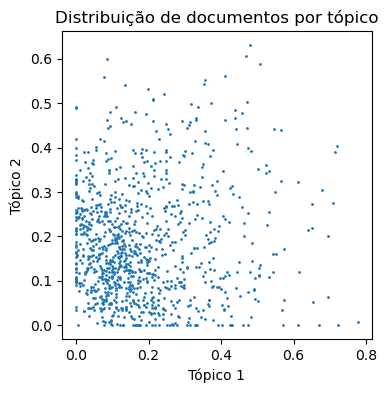

In [5]:
# Documentos e seus tópicos
plt.figure(figsize=(4,4))
plt.scatter(y[:,0], y[:,1], s=1)
plt.title('Distribuição de documentos por tópico')
plt.ylabel('Tópico 2')
plt.xlabel('Tópico 1')
plt.show()

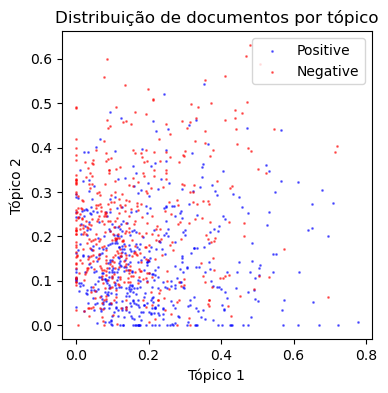

In [6]:
# Usar cores
sent = list(df['sentiment'])
yp = np.array([y[i,:] for i in range(len(sent)) if sent[i]=='positive'])
yn = np.array([y[i,:] for i in range(len(sent)) if sent[i]=='negative'])
plt.figure(figsize=(4,4))
plt.scatter(yp[:,0], yp[:,1], s=1, c='b', alpha=0.5, label='Positive')
plt.scatter(yn[:,0], yn[:,1], s=1, c='r', alpha=0.5, label='Negative')
plt.title('Distribuição de documentos por tópico')
plt.ylabel('Tópico 2')
plt.xlabel('Tópico 1')
plt.legend()
plt.show()

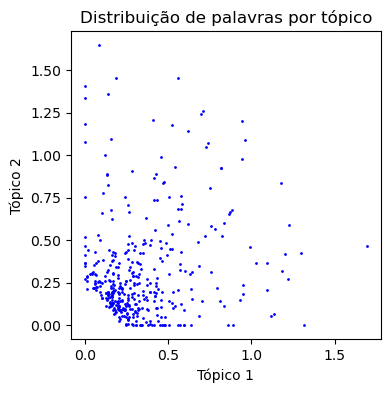

In [7]:
# Palavras por tópico
v = nmf.components_
plt.figure(figsize=(4,4))
plt.scatter(v[0,:], v[1,:], s=1, c='b')
plt.title('Distribuição de palavras por tópico')
plt.ylabel('Tópico 2')
plt.xlabel('Tópico 1')
plt.show()


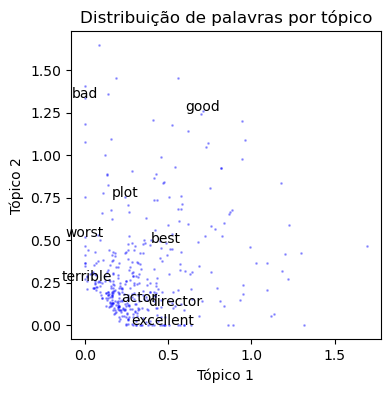

In [8]:
# Mostrando algumas palavras em overlay
v = nmf.components_
plt.figure(figsize=(4,4))
plt.scatter(v[0,:], v[1,:], s=1, alpha=0.3, c='b')
for s in ["director", "actor", "bad", "good", "excellent", "plot", "worst", "best", "terrible"]:
    _n = vectorizer.vocabulary_[s]
    plt.text(v[0,_n], v[1,_n], s, ha='center')
plt.title('Distribuição de palavras por tópico')
plt.ylabel('Tópico 2')
plt.xlabel('Tópico 1')
plt.show()

## Lidando com dados de dimensão mais alta

In [9]:
n_components = 60
vectorizer = CountVectorizer(binary=True, max_features=400, min_df=0.02, max_df=0.4)
X = vectorizer.fit_transform(list(df['review']))
print(X.shape)
nmf = NMF(n_components=n_components, init='nndsvda')
y = nmf.fit_transform(X.toarray())

(1000, 400)


C:\Users\tiagoft1\AppData\Roaming\Python\Python39\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


### PCA

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(2)
y_pca = pca.fit_transform(y)

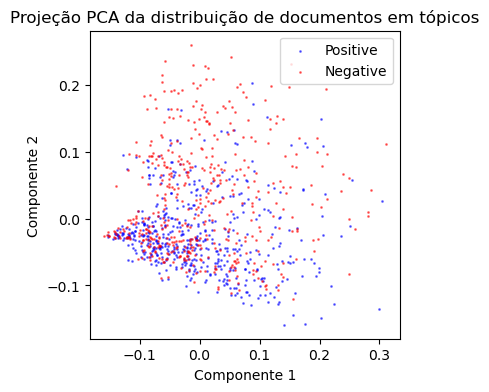

In [12]:
# Usar cores
sent = list(df['sentiment'])
yp = np.array([y_pca[i,:] for i in range(len(sent)) if sent[i]=='positive'])
yn = np.array([y_pca[i,:] for i in range(len(sent)) if sent[i]=='negative'])
plt.figure(figsize=(4,4))
plt.scatter(yp[:,0], yp[:,1], s=1, c='b', alpha=0.5, label='Positive')
plt.scatter(yn[:,0], yn[:,1], s=1, c='r', alpha=0.5, label='Negative')
plt.title('Projeção PCA da distribuição de documentos em tópicos')
plt.ylabel('Componente 2')
plt.xlabel('Componente 1')
plt.legend()
plt.show()

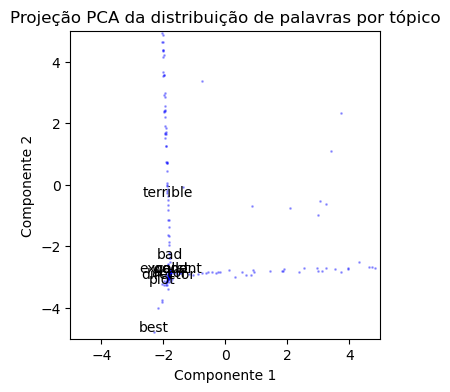

In [13]:
# Distribuição de palavras
v = nmf.components_
pca2 = PCA(2)
v_pca = pca2.fit_transform(v.T).T
plt.figure(figsize=(4,4))
plt.scatter(v_pca[0,:], v_pca[1,:], s=1, alpha=0.3, c='b')
for s in ["director", "actor", "bad", "good", "excellent", "plot", "worst", "best", "terrible"]:
    _n = vectorizer.vocabulary_[s]
    plt.text(v_pca[0,_n], v_pca[1,_n], s, ha='center')
plt.title('Projeção PCA da distribuição de palavras por tópico')
plt.ylabel('Componente 2')
plt.xlabel('Componente 1')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.show()

### Isomap

In [14]:
from sklearn.manifold import Isomap

In [15]:
iso = Isomap(n_neighbors=5, n_components=2)
y_iso = iso.fit_transform(y)

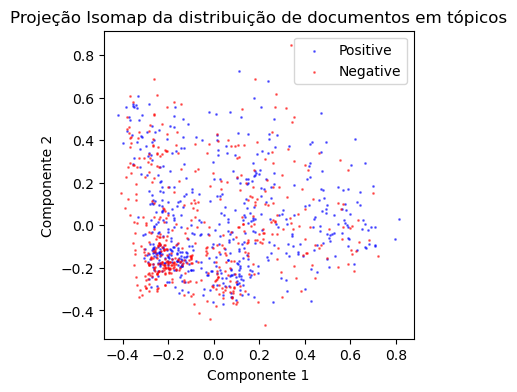

In [16]:
# Usar cores
sent = list(df['sentiment'])
yp = np.array([y_iso[i,:] for i in range(len(sent)) if sent[i]=='positive'])
yn = np.array([y_iso[i,:] for i in range(len(sent)) if sent[i]=='negative'])
plt.figure(figsize=(4,4))
plt.scatter(yp[:,0], yp[:,1], s=1, c='b', alpha=0.5, label='Positive')
plt.scatter(yn[:,0], yn[:,1], s=1, c='r', alpha=0.5, label='Negative')
plt.title('Projeção Isomap da distribuição de documentos em tópicos')
plt.ylabel('Componente 2')
plt.xlabel('Componente 1')
plt.legend()
plt.show()

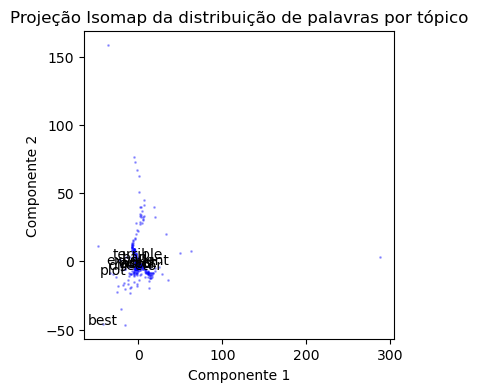

In [17]:
# Distribuição de palavras
v = nmf.components_
iso2 = Isomap(n_components=2, n_neighbors=5)
v_iso = iso2.fit_transform(v.T).T
plt.figure(figsize=(4,4))
plt.scatter(v_iso[0,:], v_iso[1,:], s=1, alpha=0.3, c='b')
for s in ["director", "actor", "bad", "good", "excellent", "plot", "worst", "best", "terrible"]:
    _n = vectorizer.vocabulary_[s]
    plt.text(v_iso[0,_n], v_iso[1,_n], s, ha='center')
plt.title('Projeção Isomap da distribuição de palavras por tópico')
plt.ylabel('Componente 2')
plt.xlabel('Componente 1')
#plt.xlim([-20,20])
#plt.ylim([-20,20])
plt.show()

### T-SNE

In [18]:
from sklearn.manifold import TSNE

In [19]:
tsne = TSNE(n_components=2, perplexity=15)
y_tsne = tsne.fit_transform(y)

C:\Users\tiagoft1\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\tiagoft1\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


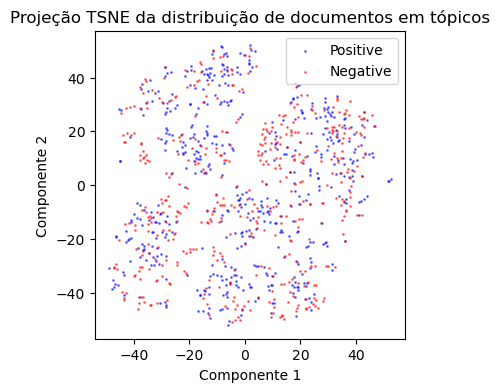

In [20]:
# Usar cores
sent = list(df['sentiment'])
yp = np.array([y_tsne[i,:] for i in range(len(sent)) if sent[i]=='positive'])
yn = np.array([y_tsne[i,:] for i in range(len(sent)) if sent[i]=='negative'])
plt.figure(figsize=(4,4))
plt.scatter(yp[:,0], yp[:,1], s=1, c='b', alpha=0.5, label='Positive')
plt.scatter(yn[:,0], yn[:,1], s=1, c='r', alpha=0.5, label='Negative')
plt.title('Projeção TSNE da distribuição de documentos em tópicos')
plt.ylabel('Componente 2')
plt.xlabel('Componente 1')
plt.legend()
plt.show()

C:\Users\tiagoft1\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\tiagoft1\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


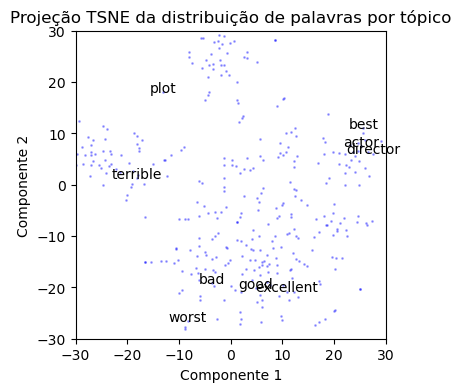

In [21]:
# Distribuição de palavras
v = nmf.components_
tsne2 = TSNE(n_components=2, perplexity=15)
v_tsne2 = tsne2.fit_transform(v.T).T
plt.figure(figsize=(4,4))
plt.scatter(v_tsne2[0,:], v_tsne2[1,:], s=1, alpha=0.3, c='b')
for s in ["director", "actor", "bad", "good", "excellent", "plot", "worst", "best", "terrible"]:
    _n = vectorizer.vocabulary_[s]
    plt.text(v_tsne2[0,_n], v_tsne2[1,_n], s, ha='center')
plt.title('Projeção TSNE da distribuição de palavras por tópico')
plt.ylabel('Componente 2')
plt.xlabel('Componente 1')
plt.xlim([-30,30])
plt.ylim([-30,30])
plt.show()